# Table of contents
    1. The Fourier Transform:
        - intuition of FT
        - show one example of FT

### Good Resource :
- This youtube lecture series has a very good explanation of  fourier transfomr https://www.youtube.com/playlist?list=PLWMUMyAolbNuWse5uM3HBwkrJEVsWOLd6

# 1. Fourier Transform introduction and Intuition:
At its core **Fourier Transform** is decomposing complex sounds into frequency components.
we apply ft to time domain signal and we get a freq representation of the signal.
if we look at the fig below we could see that some particular freq has higher magnitude in the freq plot. Thus we get some better idea of the signal in the freq domain plot

![ft_basic](./images/ft_basic.png)

**step_by_step fft:**<br>
-Compare signal with sinusoids of various frequencies<br>
-For each frequency we get a magnitude
and a phase<br>
-High magnitude indicates high similarity between the signal
and a sinusoid<br>

To understand this process let's check the following code

In [59]:
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

### Load piano middle C5 which has freq 525hz

In [60]:
# load audio file in the player
audio_path = "audio_files/piano_c.wav"
ipd.Audio(audio_path)

In [61]:
# load audio file
# by default librosa samples the audio with 22.1khz
# i think this is because most of the audio freq 
# generally lies below 11khz ??
signal, sr = librosa.load(audio_path)

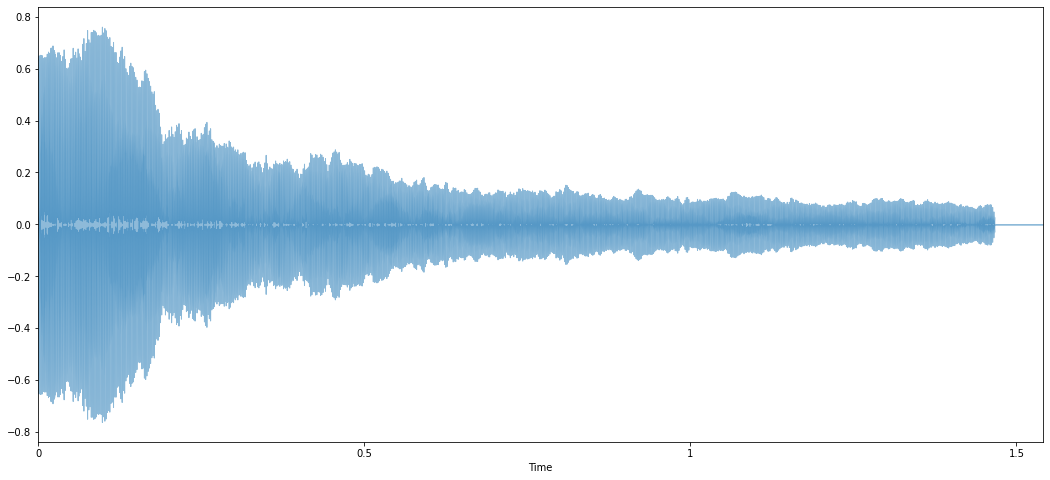

In [62]:
# plot waveform
plt.figure(figsize=(18, 8))
librosa.display.waveplot(signal, sr=sr, alpha=0.5)
plt.show()

### let's use scipy to get the FT of the waveform
    - we will have a magnitude and a phase
    - more on this later as we understand FT with respect to complex number
    

In [63]:
# derive spectrum using FT
ft = sp.fft.fft(signal) # this will return complex values
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude)) 

# import thing to notice here is magnitude will be y axis of freq plot
# the x axis will be freq from 0 to sampling rate(22.k) with steps of magnitude

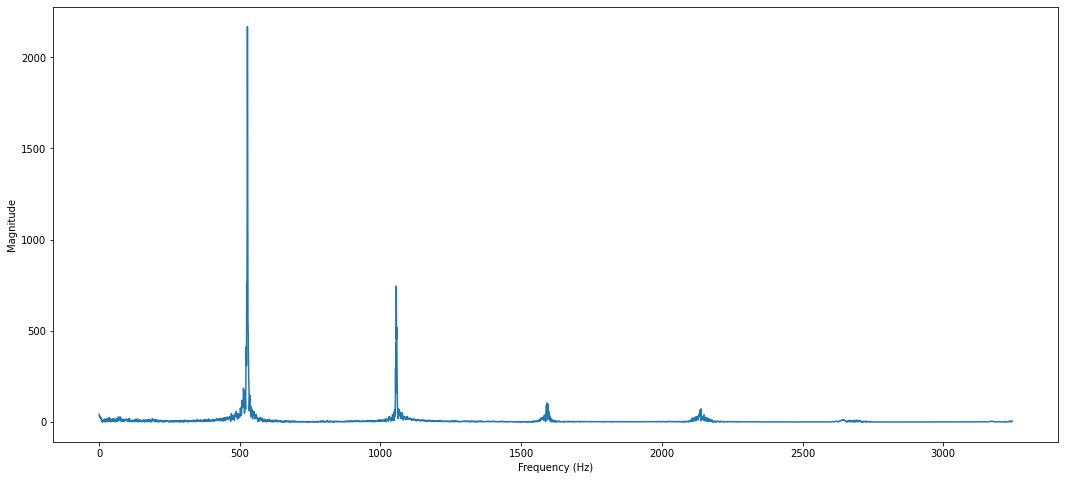

In [64]:
# plot spectrum
plt.figure(figsize=(18, 8))
## why 5000??
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum 
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

### somethings to notice from the plot above
    - the fundemental freq occurs around 523 which is out C5
    - the other peaks are the harmonic partials 

### let's zoom into our original signal
    - let's say we want to randomly check the signal from 10000 to 10400 time steps

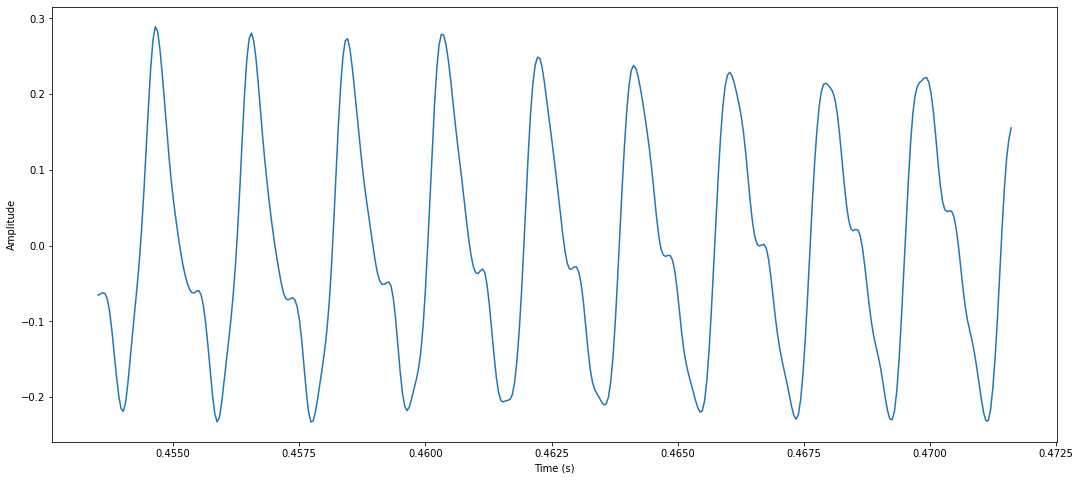

In [65]:
# zomm in to the waveform

samples = range(len(signal))
t = librosa.samples_to_time(samples, sr=sr)

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400]) 
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# let's create 2 sinusoid of the using the fundamental freq that is 523hz
    - one thing to notice here that the waveform follows the equation below
    - for every integer values of phase the 2 sinusoid overlaps

![sine_wave_eqn.png](./images/sine_wave_eqn.png)

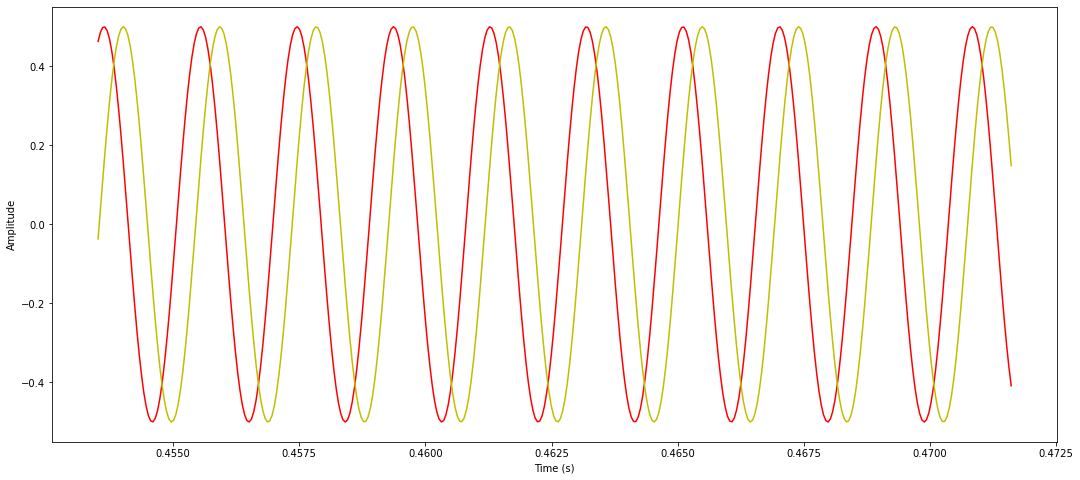

In [66]:
# create a sinusoid

f = 523
phase = 0
phase2 = 0.2

sin = 0.5 * np.sin(2*np.pi * (f * t - phase))
sin2 = 0.5 * np.sin(2*np.pi * (f * t - phase2))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], sin[10000:10400], color="r")
plt.plot(t[10000:10400], sin2[10000:10400], color="y")


plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

### Now comes the important part of how to do FT
    - we take one freq sinusoid let's say fundamental freq
    - we multiply that with original signal 
    - wherever the signals are matching we will have higher overlapping positive area
    - wherever they have opposite sign they will have negative area
    - first figure with positive and negative ares
    - second figure with high positive area
    - note we are changing the phase value empirically
    - the higher the area basically the higher the similarity between the sinusoid vs the signal

### compare signal and sinusoids
    - high positive area with phase 0.55

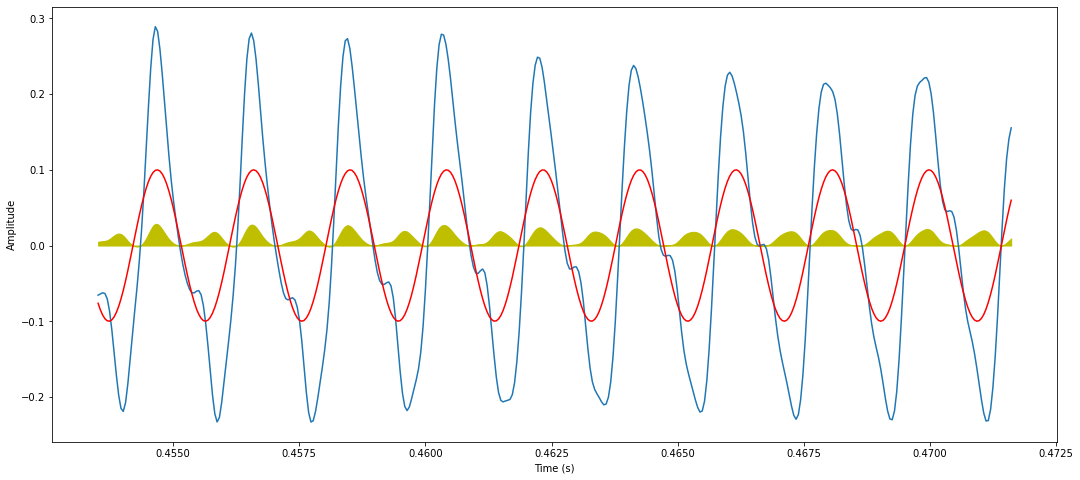

In [67]:


f = 523
phase = 0.55

sin = 0.1 * np.sin(2*np.pi * (f * t - phase))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400]) 
plt.plot(t[10000:10400], sin[10000:10400], color="r")

plt.fill_between(t[10000:10400], sin[10000:10400]*signal[10000:10400], color="y")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


### compare signal and sinusoids
    - we have positive and negative area with phase 0.3

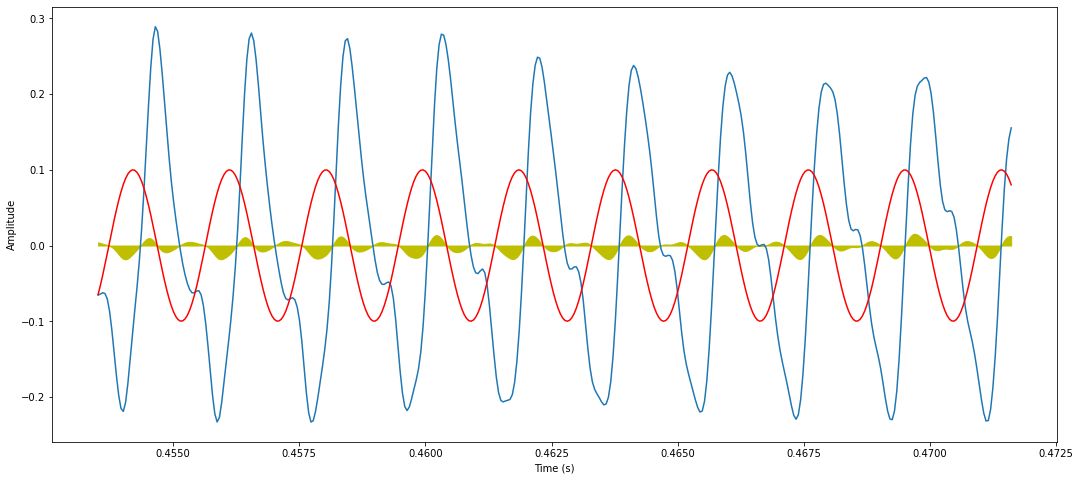

In [68]:
# compare signal and sinusoids

f = 523
phase = 0.3

sin = 0.1 * np.sin(2*np.pi * (f * t - phase))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400]) 
plt.plot(t[10000:10400], sin[10000:10400], color="r")

plt.fill_between(t[10000:10400], sin[10000:10400]*signal[10000:10400], color="y")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


### so to summarize what we have done above is
    - we have our original signal which we have sampled with a freq of 22.1khz
    - we then take a small chunk of the original signal 
    - we know that out original signal has fundamental freq 523hz as it is C5
    - we create one sinusoid using this fundamental freq
    - we then multiply this sine wave with the original wave
    - idea is that for a given phase this sine wave will have higher area of multiplication with the original wave
    - that phase it what we want, once we are at that phase whatever area get get is the magnitude 

### now the stpes above are done for one freq sine wave
### if we iteratively do it for all the sine wave freq in a continuous integral, then the result somehow will indicate the important freq
### because as we know with the correct freq and phase the area is high
### if we do this for all freq we get the fourier transform of the signal

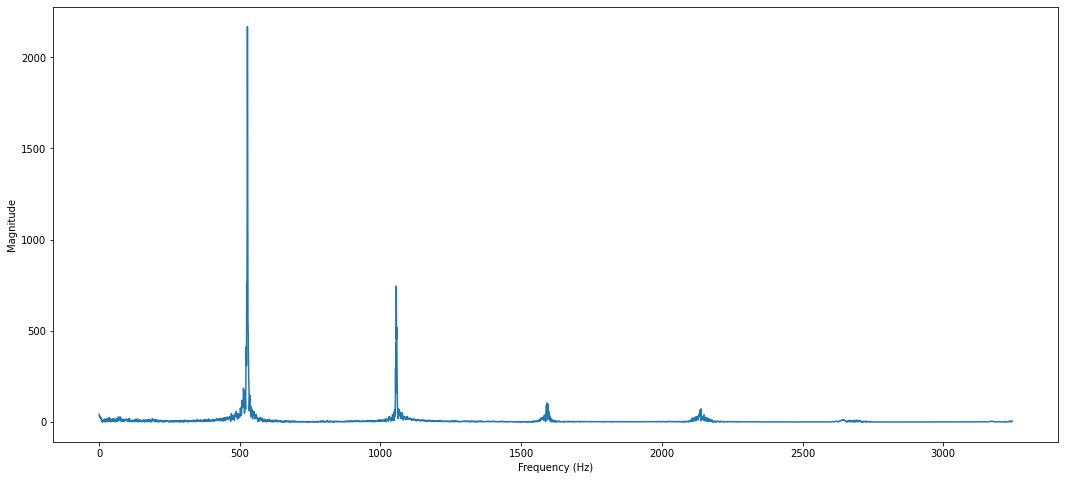

In [69]:
# plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

![ft_integral](./images/ft_integral.png)

**Fourier Transform formula:**<br>
if we look at the formula above we first multiply one sinusoid with the original signal, we do it for the entire time of the signal. To get the phase we take the argmax of 0 to 1 and to get the magnitude we take the max value.

This is a continuous time integral.